# The Adaptive Projected Subgradient Method (APSM)

## Reference: Sergios' Machine Learning book

In [2]:
import numpy as np

In [16]:
def norm(x):
    return np.sqrt(sum(x**2))

def projection(y,x,epsilon,theta):
    """The projection of a point theta, on hyperplane/hyperslab defined by (y,x,epsilon) """
    v = np.dot(x,theta) -y
    if v+epsilon < 0:
        beta = (-v -epsilon)/norm(x)**2
    elif v-epsilon > 0:
        beta = (-v + epsilon)/norm(x)**2
    else:
        beta = 0
    return theta + beta*x

In [79]:
# Generate data
rgen = np.random.RandomState(1)
l = 100 # the dimensionality of the unknown parameter
theta = rgen.normal(loc=0,scale=1,size=l) # the true value of the model y = theta*x + eta
q = 30 # the window length of the APSM algorithm
N = 3500 # number of observed samples


sigma = 0.1 # the noise variance of eta
factor = 0.5 # mu = factor* M_n
epsilon = np.sqrt(1)*sigma # the sensitivity of linear e-insensitive lost function


# generate the observations
eta = rgen.normal(loc=0,scale=sigma,size=N)
X = rgen.normal(loc=0,scale=1,size=(N,l))
y = X.dot(theta)+eta

theta0 = rgen.normal(loc=0,scale=1,size=l) # initial value
mse=[]
# The main loop of estimating theta
for i in range(N-1):
    n = i+1
    if n >1:
        theta_hat_old = theta_hat_new
    else:
        theta_hat_old = theta0
    # updating the parameter
    if n < q:
        idx = [ i for i in range(0,n)]
        w = np.ones(n)*(1/n)
    else:
        idx = [ i for i in range(n-q+1,n+1)]
        w = np.ones(q)/q
    
    X_active = X[idx,:]
    y_active = y[idx]
    
    Ps = [projection(yy,xx,epsilon,theta_hat_old) for yy,xx in zip(y_active,X_active)]
    const = norm(theta_hat_old - sum(w[:,np.newaxis]*Ps))**2
    M = w.dot(np.array([norm(p-theta_hat_old)**2 for p in Ps])/const)
    mu = factor*M
    theta_hat_new = theta_hat_old + mu*(sum(w[:,np.newaxis]*Ps)-theta_hat_old)
                     
    mse.append(10*np.log10(np.mean((theta - theta_hat_new)**2)))

                     

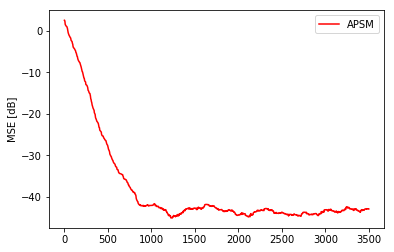

In [82]:
# plot the results
import matplotlib.pyplot as plt
plt.figure()
plt.plot(mse,color='r',label='APSM')
plt.ylabel('MSE [dB]')
plt.legend(loc='upper right')
plt.show()